<a href="https://colab.research.google.com/github/GavrilenkoA/statistics_IB/blob/HW1/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22homework_lecture_5_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Всем привет! Пришло время нашей первой домашней работы не на степике. Надеюсь, будет весело :)

Так как, `pandas` вы еще не проходили, то я вам немного помогу. Эту домашку можно делать как в питоне, так и в R, само задание будет написано в `Google Colaboratory`.

In [1]:
# Pandas понадобится нам для чтения денных
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# В переменную data_path надо положить путь до данных
data_path = "/content/homework_lecture_5_data.csv"
expression_data = pd.read_csv(f"{data_path}", index_col=0)
expression_data.head()

,TMCC1,RANBP3,GABRG3,ARRDC5,LRP3,TIMM23,TBPL1,BIRC8,TTC28,C19orf66,...,MAGEA6,IL4I1,LCN12,SMG6,C1orf100,WDR75,ZBTB26,SPTY2D1,PLEKHA2,Cell_type
0,33.888550,38.384340,0.044721,1.385159,11.341853,105.193306,26.463990,0.000000,1.537873,27.645407,...,21.332443,1.397932,0.000000,23.136585,0.001902,60.218548,6.307399,9.577274,44.026940,B_cell
1,16.497124,35.054090,0.314645,4.329797,8.649321,50.577618,16.684614,0.000000,1.796609,13.715611,...,1.199440,159.147130,0.259244,18.986986,0.310971,25.818224,4.193348,14.181196,35.779896,B_cell
2,5.449933,31.783958,0.002949,2.137536,1.750892,109.201050,35.265984,0.011501,0.878889,19.361662,...,0.002924,25.256378,0.000000,32.941895,0.000000,99.555990,8.323141,29.321960,30.816538,B_cell
3,33.362240,56.147026,0.037295,1.604904,6.807299,100.141620,25.446817,0.000000,2.502661,12.745437,...,0.000000,14.509516,0.063003,19.036896,0.000000,49.394980,4.655794,17.683067,47.143270,B_cell
4,50.188510,30.165264,0.039678,1.501439,1.619954,46.916790,28.053373,0.018181,1.165164,30.318027,...,0.033807,93.681190,0.031816,19.094831,0.000000,20.201437,6.935232,20.769829,53.935143,B_cell


In [5]:
b_cells_expression_data = expression_data.query("Cell_type == 'B_cell'")
nk_cells_expression_data = expression_data.query("Cell_type == 'NK_cell'")

In [6]:
b_cells_expression_data.to_csv("b_cells_expression_data.csv")
nk_cells_expression_data.to_csv("nk_cells_expression_data.csv")

Уточним что размер выборок двух клеточных типов с данными экспрессии равны

In [7]:
len(b_cells_expression_data) == len(nk_cells_expression_data)

True

В этом задании мы будем работать с данными об экспрессии генов в друх клеточных типах: в B-клетках и в NK-клетках. Выясним, средняя экспрессия каких генов значимо различается в этих клеточных типах.

Я буду показывать примеры на одном гене, а на основе них вы сможете сделать похожие задачи для всех генов.

In [8]:
example_gene = "TMCC1"

## Задание 1

**2 баллов**

Посмотрим на распределение экспрессий гена `TMCC1` в обоих клеточных типах.

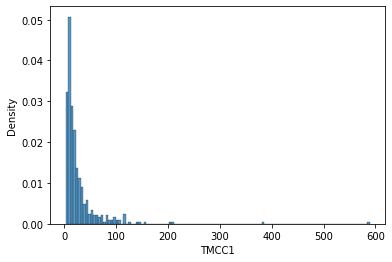

In [9]:
sns.histplot(b_cells_expression_data[example_gene], stat="density");

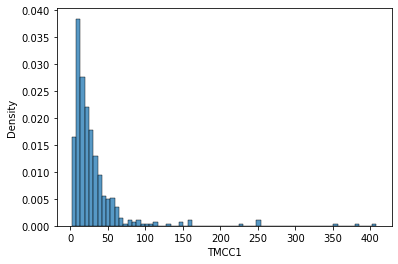

In [10]:
sns.histplot(nk_cells_expression_data[example_gene], stat="density");

Кажется, что они немного различаются. Для начала давайте попробуем еще раз проверить центральную предельную теорему.

**Задание:**

Напишите функцию, которая будет принимать на вход экспрессии гена, семплировать их них выборки размера `sample_size`, считать среднюю экспрессию и повторять это `n_samples` раз. Примените эту функцию к экспрессиям гена `TMCC1` в обоих клеточных типах, визуализируйте их. Отличаются ли средние экспрессии данного гена у этих клеточных типов?
 
Сигнатура функции:

```python
def demonstrate_clt(expressions, sample_size, n_samples):
    mean_expressions = []

    return mean_expressions
```

Выведем истинные средние экспрессии из двух клеточных типов:

In [11]:
nk_cells_expression_data[example_gene].mean() 

30.4313196004

In [12]:
b_cells_expression_data[example_gene].mean()

26.978971829200002

Вроде средние отличаются, вопрос статистически ли достоверно? 

In [14]:
def demonstrate_clt(expressions, sample_size, n_samples):
    sum_ind_random_sample = []
    for _ in range(n_samples):
        random_sample = np.random.choice(expressions, sample_size)
        mean_of_sample = random_sample.mean()
        sum_ind_random_sample.append(mean_of_sample)
    sum_ind_random_sample = np.array(sum_ind_random_sample)
    return sum_ind_random_sample

In [15]:
nk_cells_expr_mean = demonstrate_clt(nk_cells_expression_data[example_gene], sample_size = 100, n_samples = 10000)

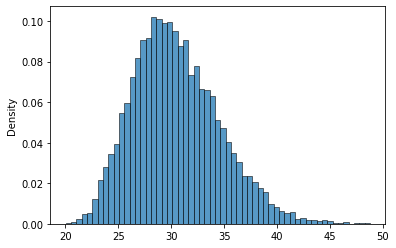

In [16]:
sns.histplot(nk_cells_expr_mean, stat="density");

In [17]:
nk_cells_expr_mean.mean()

30.459758399364997

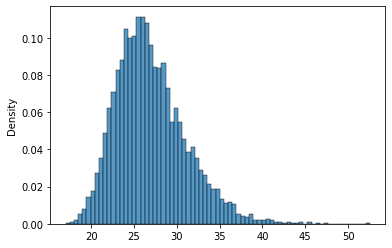

In [18]:
b_cells_expr_mean = demonstrate_clt(b_cells_expression_data[example_gene], sample_size = 100, n_samples = 10000)
sns.histplot(b_cells_expr_mean, stat="density");

In [19]:
b_cells_expr_mean.mean()

26.959755129320104

А теперь посчитайте 95% доверительные интервалы для обоих распределений (примем тот факт, что средние распределены нормально для обоих клеточных типов) и скажите, отличается ли средняя экспрессия данного гена между клеточными типами?

In [20]:
sd_nk = nk_cells_expression_data[example_gene].std() # знаем стандартное отклонение генеральной совокупности 
se_nk = sd_nk / np.sqrt(len(nk_cells_expr_mean))  # считаем стандартную ошибку среднего 
left_bound_nk = nk_cells_expr_mean.mean() - 1.96*se_nk
right_bound_nk = nk_cells_expr_mean.mean() + 1.96*se_nk

In [21]:
left_bound_nk, right_bound_nk

(29.660009730791785, 31.25950706793821)

In [22]:
sd_b_cell = b_cells_expression_data[example_gene].std() # знаем стандартное отклонение генеральной совокупности 
se_b_cell = sd_b_cell / np.sqrt(len(b_cells_expr_mean))  # считаем стандартную ошибку среднего 
left_bound_b_cell = b_cells_expr_mean.mean() - 1.96*se_b_cell
right_bound_b_cell = b_cells_expr_mean.mean() + 1.96*se_b_cell

In [23]:
left_bound_b_cell, right_bound_b_cell

(26.165921157798458, 27.75358910084175)

Вывод: границы доверительных интервалов не перекрываются, средние экспрессии генов  статистически значимо различаются 

## Задание 2

**4 баллов**

Вспомнили центральную предельную теорему и то, как считать доверительные интервалы в простом случае, теперь давайте воспользуемся библиотечной реализацией для того, чтобы протестировать уже все гены. 

In [24]:
import scipy.stats as st

Посчитаем доверительные интервалы для нашего демонстрационного гена в обоих клеточных типах:

In [25]:
# B клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(b_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(b_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(b_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(23.420272072079296, 30.53767158632071)

In [26]:
# NK клетки
st.t.interval(alpha=0.95, # 95% доверительный интервал
              df=len(nk_cells_expression_data[example_gene]) - 1, # число степеней свободы - 1
              loc=np.mean(nk_cells_expression_data[example_gene]), # Среднее
              scale=st.sem(nk_cells_expression_data[example_gene])) # Стандартная ошибка среднего

(26.84610468807562, 34.01653451272438)

Напишите функцию для проверки того, что доверительные интервалы пересекаются. На лекции мы тестировали гипотезы для равенства среднего выборки заданному числу и проверяли, попало ли оно в границы этого интервала или нет, если оно оказывалось за ними, то мы говорили, что средние отличаются. Здесь же мы имеем дело с двумя выборками, поэтому будем проверять, пересекаются ли доверительные интервалы, и, если нет, то говорить о том, что средние в выборках отличаются.

```python
def check_intervals_intersect(first_ci, second_ci):   

    return are_intersect # True or False
```

In [27]:
def check_intervals_intersect(first_ci, second_ci):
    L1, R1 = first_ci
    L2, R2 = second_ci
    if R2 < L1 or R1 < L2:
        are_intersect = True
    else:
        are_intersect = False
    return are_intersect # True or False

In [29]:
expression_data.columns[:-1]  # all genes

Index(['TMCC1', 'RANBP3', 'GABRG3', 'ARRDC5', 'LRP3', 'TIMM23', 'TBPL1',
       'BIRC8', 'TTC28', 'C19orf66',
       ...
       'CFAP221', 'MAGEA6', 'IL4I1', 'LCN12', 'SMG6', 'C1orf100', 'WDR75',
       'ZBTB26', 'SPTY2D1', 'PLEKHA2'],
      dtype='object', length=18792)

Теперь для каждого гена посчитайте доверительные интервалы в обоих клеточных типах, и проверьте, пересекаются ли они? Результаты можно добавлять в список, например:

```python
ci_test_results = [True, False, ..., True]
```

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ci(first_table, second_table):
    # dge - differential gene expression

    return ci_test_results
```

In [30]:
def check_dge_with_ci(first_table, second_table):
    ci_test_results = []
    for gene in first_table.columns[:-1]:
        first_ci = st.t.interval(alpha=0.95, df=len(first_table[gene]) - 1, loc=np.mean(first_table[gene]), 
              scale=st.sem(first_table[gene]))
        second_ci = st.t.interval(alpha=0.95, df=len(second_table[gene]) - 1, loc=np.mean(second_table[gene]), 
              scale=st.sem(second_table[gene]))
        res = check_intervals_intersect(first_ci, second_ci)
        ci_test_results.append(res)
    ci_test_results = np.array(ci_test_results)
    return ci_test_results

In [44]:
ci_test_results = check_dge_with_ci(b_cells_expression_data, nk_cells_expression_data)

18792

## Задание 3

**4 баллов**

Давайте теперь применим для той же задачи `z-критерий`. Будем считать, что в данном случае $\alpha$ = 0.05, и если полученное `p-value` будет меньше, то экспрессия генов значимо отличается.

In [33]:
from statsmodels.stats.weightstats import ztest

In [34]:
# Наш излюбленный ген
ztest(
    b_cells_expression_data[example_gene],
    nk_cells_expression_data[example_gene]
)

(-1.3427434041885127, 0.17935507499860204)

In [35]:
_, p_value = ztest(b_cells_expression_data[example_gene],nk_cells_expression_data[example_gene])

Попытайтесь оформить это в виде функции, которая будет принимать на вход две таблицы с экспрессиями и выдавать для каждого гена, значимо ли отличается его средняя экспрессия между клеточными типами.

```python
def check_dge_with_ztest(first_table, second_table):
    # dge - differential gene expression

    return z_test_results
```

In [46]:
def check_dge_with_ztest(first_table, second_table):
    z_test_results = []
    p_values = []
    for gene in first_table.columns[:-1]:
        _, p_value = ztest(first_table[gene], second_table[gene])
        p_values.append(p_value)
        if p_value <= 0.05:
            z_test_results.append(True)
        else:
            z_test_results.append(False)
    z_test_results = np.array(z_test_results)
    p_values = np.array(p_values)
    return z_test_results, p_values

In [48]:
z, _ = check_dge_with_ztest(b_cells_expression_data, nk_cells_expression_data)

In [49]:
ci = check_dge_with_ci(b_cells_expression_data, nk_cells_expression_data)

Интересно посмотреть в скольких вариантов результаты тестов не совпадают:

In [50]:
compare = z!=ci

In [51]:
np.sum(compare)

1485

Из 18792 выходов теста 1485 дали противоположные результаты

## Задание 4

**10 баллов**

Теперь пришла пора оформить все ваши старания в виде программы. Напишите программу, которая принимает на вход следующие аргуметры:

1. `first_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для одного клеточного типа;
2. `second_cell_type_expressions_path` &ndash; путь до таблицы с экспрессиями генов для второго клеточного типа;
3. `save_results_table` &ndash; название таблицы с результатами.

Считывать аргументы можно любым удобным способом (например, `input`, `argparse`).

Как читать данные при помощи пандаса мы уже знаем, осталось понять, как записывать результаты. Допустим, вы записывали результаты ваших тестов в списки, тогда создать пандасовский датафрейм можно следующим образом:

In [ ]:
ci_test_results = [True, False, True]
z_test_results = [True, True, True]
# Опционально можно также сохранять p-value для z-критерия
z_test_p_values = [0.004, 0.01, 0.0001]
# Также сохраните разницу в средних экспрессиях между 1 и 2 таблицами для каждого гена,
# чтобы было понять, уменьшается или увеличивается экспрессия гена
mean_diff = [-10, 10, 0.5]

# Созданим словарь {'название колонки': список_значений}
results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff
}

# Из словаря делаем датафрейм
results = pd.DataFrame(results)
results.head()

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,True,True,0.0040,-10.0
1,False,True,0.0100,10.0
2,True,True,0.0001,0.5


In [ ]:
# Сохраним таблицу в .csv файл
results.to_csv("path_to_your_awesome_results.csv")

In [59]:
def calc_mean_diff(table1, table2):
    genes = table1.columns[:-1]
    mean_diff = []
    for gene in genes:
        mean_b_cell = table1.loc[:, gene].mean()
        mean_nk_cell = table2.loc[:, gene].mean()
        diff = mean_b_cell - mean_nk_cell
        mean_diff.append(diff)
    mean_diff = np.array(mean_diff)
    return mean_diff

In [60]:
def dfg_analyze(b_cell_path, nk_cell_path):
    b_cell_data = pd.read_csv(b_cell_path, index_col = 0)
    nk_cell_data = pd.read_csv(nk_cell_path, index_col = 0)
    ci_test_results = check_dge_with_ci(b_cell_data, nk_cell_data)
    z_test_results, z_test_p_values = check_dge_with_ztest(b_cell_data, nk_cell_data)
    mean_diff = calc_mean_diff(b_cell_data, nk_cell_data)
    results = {
    "ci_test_results": ci_test_results,
    "z_test_results": z_test_results,
    "z_test_p_values": z_test_p_values,
    "mean_diff": mean_diff}
    results = pd.DataFrame(results)
    return results

In [54]:
b_cell_path = "/content/b_cells_expression_data.csv"
nk_cell_path = "/content/nk_cells_expression_data.csv"

In [61]:
results = dfg_analyze(b_cell_path, nk_cell_path)

In [62]:
results

,ci_test_results,z_test_results,z_test_p_values,mean_diff
0,False,False,0.179355,-3.452348
1,True,True,0.000063,-6.473981
2,False,False,0.704603,0.763407
3,True,True,0.015754,-3.334424
4,False,False,0.091768,2.725465
...,...,...,...,...
18787,False,False,0.948941,0.071215
18788,False,True,0.026036,3.675664
18789,False,False,0.366890,1.322516
18790,False,False,0.114598,-2.393473


In [63]:
results.to_csv("my_awesome_results.csv")

## Задание 5

**0.5 баллов (доп.)**

В онлайне сложно знакомиться, а особенно сейчас. Созвонитесь с кем-то из других студентов и прикрипите сюда скрин вашего созвона. Можно коротко описать, о чем вы говорили)

не успел( 